## Tourism in Ireland 
### The primary objective of this project is to identify a datasets related to tourism in Ireland for conducting statistical analyses, data preparation, and visualization, while also implementing machine learning models all using Python programming.

### Functions:
- The following websites were used to construct the functions:
  * https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
  * https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/
  * https://www.askpython.com/python-modules/pandas/change-datetime-format-in-pandas

In [1]:
#Function_1: Column companation function
def combine(df, newCol_name, col1, col2):
    comb_df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original one
    comb_df[newCol_name] = df[col1].apply(str) +'_'+ df[col2].apply(str)
    return comb_df

In [2]:
#Function_2: Pivot function that allows to pivot tables based on month column in the datasets:
def pivot_dataset(df, column, value):
    pivot_df = df.pivot_table(index='Month',
                              columns=column,
                              values=value,
                              aggfunc='first')
    pivot_df.reset_index(inplace=True)
    return pivot_df


In [3]:
#Function_3: Drop column function
def drop_it(df, columns):
    df.drop(columns=columns, inplace=True)
    return df

In [4]:
#Function_4: Date column reshape and sort
def sort(df,dateCol):
    # Convert 'Month' column to datetime format & Format the dates as strings in the 'YYYY-MM' format
    df['Date'] = pd.to_datetime(df[dateCol],format='%Y %B').dt.strftime('%Y-%m')
    # Insert the 'date_new' column to the first position in the DataFrame
    df.insert(0, 'Date', df.pop('Date'))
    # Sort the DataFrame by the 'Month' column
    df_sorted = df.sort_values(by='Date')
    #Reset the index to match the desired output
    df_sorted.reset_index(drop=True, inplace=True)
    return df_sorted

In [5]:
#Import the libraries
import numpy as np #To perform a wide variety of mathematical operations on arrays
import pandas as pd #For manubulating the data to use data frame
import matplotlib.pyplot as plt #For ploting
import seaborn as sns # for ploting

In [6]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Exploring the datasets
Sources:
* https://data.cso.ie/table/ASM03
* https://data.cso.ie/table/ASM02
* https://data.cso.ie/table/ASM01
* https://www.met.ie/climate/available-data/historical-data


#### ASM01: International Travel (Arrivals, Departures) To Ireland Counts
Attributes:
1. Statistic Lable: Air and Sea Travel 
2. Month: Monthly
3. Direction: Arrivals, Departures
4. Contry: contries
5. Unit: Thousands
7. Value: Value of the above Statisc lable

#### ASM01: Modes of Travel (Arrivals, Departures) To Ireland Counts
Attributes:
1. Statistic Lable: Air and Sea Travel 
2. Month: Monthly
3. Direction: Arrivals, Departures
4. Mode: All modes of trasport, Air, Sea
5. Unit: Thousands
7. Value: Value of the above Statisc lable

#### ASM02: Route of Travel (Arrivals, Departures) To Ireland Counts
Attributes:
1. Statistic Lable: Air and Sea Travel 
2. Month: Monthly
3. Direction: Arrivals, Departures
4. Route: All route of travel, cross chanel, continantal Europ, Trasatanic, Other
5. Unit: Thousands
7. Value: Value of the above Statisc lable


#### mly532: Weather Data Dublin Airport Station 
Attributes:
1. year:  -  Year
2. month: -  Month
3. rain:  -  Precipitation Amount (mm)
4. meant: -  Mean Air Temperature (C)
5. maxtp: -  Maximum Air Temperature (C)
6. mintp: -  Minimum  Air Temperature (C)	
7. mnmax: -  Mean Maximum Temperature (C)
8. mnmin: -  Mean Minimum Temperature (C)
9. gmin:  -  Grass Minimum Temperature (C)
10. wdsp:  -  Mean Wind Speed (knot)
11. mxgt:  -  Highest Gust (knot)
12. sun:   -  Sunshine duration (hours)
13. ind:   -  Indicator


In [7]:
# Load the datasets
travelRoute_df = pd.read_csv('ASM02.20240325T150300.csv')
internationalTour_df=pd.read_csv('ASM03.20240325T140352Country to ireland.csv')
travelMode_df= pd.read_csv('ASM01.20240325T140328.csv')
weather_df=pd.read_csv('mly532.csv')

## EDA on Overseas arrivals and departures by year, month and routing country dataset

In [8]:
internationalTour_df.head()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010 January,Great Britain,Departures,Thousand,407.6
2,Air and Sea Travel,2010 January,Other UK (1),Arrivals,Thousand,0.9
3,Air and Sea Travel,2010 January,Other UK (1),Departures,Thousand,1.1
4,Air and Sea Travel,2010 January,Belgium,Arrivals,Thousand,12.5


In [9]:
internationalTour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6084 non-null   object 
 1   Month            6084 non-null   object 
 2   Country          6084 non-null   object 
 3   Direction        6084 non-null   object 
 4   UNIT             6084 non-null   object 
 5   VALUE            6080 non-null   float64
dtypes: float64(1), object(5)
memory usage: 285.3+ KB


* It was Observed that the count of VALUE feature is showing null values of 4

In [10]:
internationalTour_df.describe()

,VALUE
count,6080.000000
mean,136.604638
std,316.126348
min,0.000000
25%,12.800000
50%,36.100000
75%,85.400000
max,2270.700000


In [11]:
internationalTour_df.describe(include='O')

,STATISTIC Label,Month,Country,Direction,UNIT
count,6084,6084,6084,6084,6084
unique,1,169,18,2,1
top,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand
freq,6084,36,338,3042,6084


#### Dataset Manipulation and Cleaning

The 'Overseas arrivals and departures by year, month and routing country'dataset is to be reshaped and prepared. Later in this step, the dataset was pivoted so that the 'Month' the date column will be a unique value. The main perpose of this step was to prepare the dataset to be  joined with other datasets, the following steps were applied:
1. Combined column was added to prepare the table to be pivoted using Function_1 
2. Pivot operations were performed on the dataset with the 'Month' date serving as the index, using Function_2 
3. Date column 'Month'  was reshaped (from yyyy MonthName -%Y %B- to yyyy-mm -%Y-%m-) and it was ascending sorted  to start from 2010-01 to 2024-02 using Function_4
4. Deal with the missing values
5. Tidy up the dataset
6. The unnessary columns were droped using Function_3

In [12]:
#Combine two columns into one column Using companation function
internationalTour_df=combine(internationalTour_df,'Country_Direction', 'Country', 'Direction')

In [13]:
#Using Pivot function 
internationalTour_df=pivot_dataset(internationalTour_df, 'Country_Direction', 'VALUE')

In [14]:
#Using date format /sort function
internationalTour_df=sort(internationalTour_df,'Month')

In [15]:
internationalTour_df.head()

Country_Direction,Date,Month,All countries_Arrivals,All countries_Departures,Belgium_Arrivals,Belgium_Departures,France_Arrivals,France_Departures,Germany_Arrivals,Germany_Departures,...,"Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals","Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Departures",Spain_Arrivals,Spain_Departures,Switzerland_Arrivals,Switzerland_Departures,United Arab Emirates_Arrivals,United Arab Emirates_Departures,United States_Arrivals,United States_Departures
0,2010-01,2010 January,773.2,791.7,12.5,12.5,48.9,45.1,45.3,42.7,...,53.6,48.8,68.6,64.2,12.3,12.4,7.6,7.6,51.7,51.2
1,2010-02,2010 February,804.0,803.2,14.3,14.1,49.1,48.3,43.9,43.0,...,47.6,45.6,65.9,66.9,12.0,11.9,6.5,6.4,41.5,42.5
2,2010-03,2010 March,989.8,1001.1,16.3,16.5,59.3,67.4,56.9,54.3,...,54.4,53.7,81.0,84.9,13.3,12.5,7.6,7.5,63.0,65.7
3,2010-04,2010 April,904.5,882.0,10.2,9.8,74.4,66.0,44.4,43.7,...,45.3,45.1,81.1,84.5,8.6,7.2,8.4,6.5,59.4,55.8
4,2010-05,2010 May,1114.9,1110.8,12.2,12.6,87.5,92.9,59.1,55.9,...,62.7,68.9,125.7,138.6,10.1,10.1,8.3,6.9,79.0,73.7


The dataset was checked for null values. some null values were found in the 'Other UK (1)_Arrivals' and'Other UK (1)_Departures' columns. 

In [16]:
internationalTour_df.isnull().sum()

Country_Direction
Date                                                                              0
Month                                                                             0
All countries_Arrivals                                                            0
All countries_Departures                                                          0
Belgium_Arrivals                                                                  0
Belgium_Departures                                                                0
France_Arrivals                                                                   0
France_Departures                                                                 0
Germany_Arrivals                                                                  0
Germany_Departures                                                                0
Great Britain_Arrivals                                                            0
Great Britain_Departures                                  

In [17]:
missing_values = internationalTour_df.isnull()
rows_missing_values = internationalTour_df[missing_values.any(axis=1)]
rows_missing_values

Country_Direction,Date,Month,All countries_Arrivals,All countries_Departures,Belgium_Arrivals,Belgium_Departures,France_Arrivals,France_Departures,Germany_Arrivals,Germany_Departures,...,"Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals","Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Departures",Spain_Arrivals,Spain_Departures,Switzerland_Arrivals,Switzerland_Departures,United Arab Emirates_Arrivals,United Arab Emirates_Departures,United States_Arrivals,United States_Departures
132,2021-01,2021 January,108.0,118.7,1.0,1.4,9.8,8.1,5.0,4.9,...,14.7,12.7,14.7,11.7,1.2,1.8,3.9,4.6,4.1,7.2
141,2021-10,2021 October,925.5,895.1,12.7,11.9,58.9,52.6,46.8,45.3,...,85.9,75.3,152.2,140.9,9.8,9.2,8.8,9.1,32.8,35.5


In [18]:
#Use .loc to select rows from 2020-02 to 2022-02 conditions
covid_raws = internationalTour_df.loc[(internationalTour_df['Date'] >= '2020-02') 
                                      & (internationalTour_df['Date'] <= '2022-02'),
                                      ['Date','Other UK (1)_Arrivals', 'Other UK (1)_Departures']]

covid_raws

Country_Direction,Date,Other UK (1)_Arrivals,Other UK (1)_Departures
121,2020-02,1.5,1.6
122,2020-03,0.8,1.0
123,2020-04,0.0,0.0
124,2020-05,0.0,0.0
125,2020-06,0.0,0.0
126,2020-07,0.0,0.0
127,2020-08,0.0,0.0
128,2020-09,0.0,0.0
129,2020-10,0.0,0.0
130,2020-11,0.0,0.0


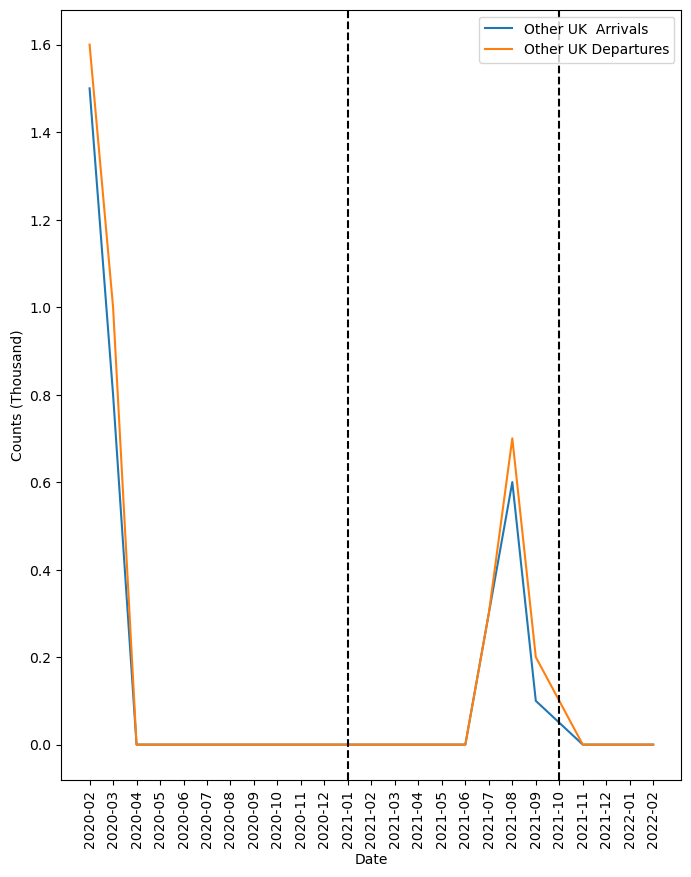

In [19]:
#to visualise the data in the unique conditions
plt.figure(figsize=(8,10))
sns.lineplot(x="Date", y='Other UK (1)_Arrivals', data=covid_raws, label='Other UK  Arrivals')
sns.lineplot(x="Date", y='Other UK (1)_Departures', data=covid_raws, label='Other UK Departures')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Counts (Thousand)')

# Rotate the dates vertically
plt.xticks(rotation=90)

#plt.scatter(x='2021-01', y= '0', color='red', label='Point of Interest')
#plt.scatter(x='2021-10', y= '0', color='red', label='Point of Interest')

# Add dashed vertical lines
plt.axvline('2021-01', color='black', linestyle='--')
plt.axvline('2021-10', color='black', linestyle='--')
#https://stackoverflow.com/questions/34160169/kwargs-for-linestyle-and-linecolour-within-the-axvline-and-axhline-with-matplotl

# Show legend
plt.legend()

# Show the line plot
plt.show()

The researcher choose to interpolate these missing values to maintain the continuity of the dataset.

In [20]:
internationalTour_df['Other UK (1)_Departures'].interpolate(method='linear', direction='forward', inplace=True)

In [21]:
internationalTour_df['Other UK (1)_Arrivals'].interpolate(method='linear', direction='forward',inplace=True)

In [22]:
internationalTour_df.isnull().sum()

Country_Direction
Date                                                                              0
Month                                                                             0
All countries_Arrivals                                                            0
All countries_Departures                                                          0
Belgium_Arrivals                                                                  0
Belgium_Departures                                                                0
France_Arrivals                                                                   0
France_Departures                                                                 0
Germany_Arrivals                                                                  0
Germany_Departures                                                                0
Great Britain_Arrivals                                                            0
Great Britain_Departures                                  

In [23]:
#Tidy up some columns
#(Great Britain_Arrivals AND Other UK (1)_Arrivals ),
#(Other Europe (34)_Arrivals AND Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals)
internationalTour_df['All Great Britain_Arrivals'] = internationalTour_df['Great Britain_Arrivals'] + internationalTour_df['Other UK (1)_Arrivals']
internationalTour_df['Other Europe_Arrivals'] = internationalTour_df['Other Europe (34)_Arrivals'] + internationalTour_df['Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals']

In [24]:
internationalTour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 40 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Date                                                                            169 non-null    object 
 1   Month                                                                           169 non-null    object 
 2   All countries_Arrivals                                                          169 non-null    float64
 3   All countries_Departures                                                        169 non-null    float64
 4   Belgium_Arrivals                                                                169 non-null    float64
 5   Belgium_Departures                                                              169 non-null    float64
 6   France_Arrivals   

In [25]:
# Dropping the unnecessary columns
internationalTour_df = drop_it(internationalTour_df, ['Month','Great Britain_Arrivals', 'Other UK (1)_Arrivals',
                                                      'Other Europe (34)_Arrivals',
                                                      'Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals'])

In [26]:
internationalTour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 35 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Date                                                                            169 non-null    object 
 1   All countries_Arrivals                                                          169 non-null    float64
 2   All countries_Departures                                                        169 non-null    float64
 3   Belgium_Arrivals                                                                169 non-null    float64
 4   Belgium_Departures                                                              169 non-null    float64
 5   France_Arrivals                                                                 169 non-null    float64
 6   France_Departures 

## EDA on Air and Sea Travel by Mode dataset

In [27]:
travelMode_df.head()

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4


In [28]:
travelMode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1014 non-null   object 
 1   Month            1014 non-null   object 
 2   Direction        1014 non-null   object 
 3   Mode             1014 non-null   object 
 4   UNIT             1014 non-null   object 
 5   VALUE            1014 non-null   float64
dtypes: float64(1), object(5)
memory usage: 47.7+ KB


In [29]:
travelMode_df.describe()

,VALUE
count,1014.000000
mean,819.083531
std,653.410945
min,4.000000
25%,109.600000
50%,870.300000
75%,1323.825000
max,2270.700000


In [30]:
travelMode_df.describe(include='O')

,STATISTIC Label,Month,Direction,Mode,UNIT
count,1014,1014,1014,1014,1014
unique,1,169,2,3,1
top,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand
freq,1014,6,507,338,1014


#### Dataset Cleaning and Manipulation
The ' Air and Sea Travel by Mode'dataset was checked for null values. No null values were found.

In [31]:
travelMode_df.isnull().sum()

STATISTIC Label    0
Month              0
Direction          0
Mode               0
UNIT               0
VALUE              0
dtype: int64

The dataset is to be reshaped and prepared to be joined to other related datasets by applying of the following functions:

1. Combined column was added to prepare the table to be pivoted using Function_1
2. Pivot operations were performed on the dataset with the 'Month' date serving as the index, using Function_2
3. Date column 'Month' was reshaped (from yyyy MonthName -%Y %B- to yyyy-mm -%Y-%m-) and it was ascending sorted to start from   2010-01 to 2024-02 using Function_4
4. the unnessary columns were droped using Function_3

In [32]:
#Combine two columns into one column Using companation function
travelMode_df=combine(travelMode_df,'Mode_Direction', 'Mode', 'Direction')
travelMode_df.head()

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE,Mode_Direction
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2,All modes of transport_Arrivals
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4,Air_Arrivals
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8,Sea_Arrivals
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7,All modes of transport_Departures
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4,Air_Departures


In [33]:
#Using Pivot function 
travelMode_df=pivot_dataset(travelMode_df, 'Mode_Direction', 'VALUE')

In [34]:
#Using date format /sort function
travelMode_df=sort(travelMode_df,'Month')

In [35]:
# Dropping the unnecessary columns
travelMode_df = drop_it(travelMode_df, ['Month','All modes of transport_Arrivals','All modes of transport_Departures'])

In [36]:
travelMode_df.head()

Mode_Direction,Date,Air_Arrivals,Air_Departures,Sea_Arrivals,Sea_Departures
0,2010-01,728.4,732.4,44.8,59.3
1,2010-02,757.2,757.2,46.9,46.1
2,2010-03,906.6,919.6,83.3,81.5
3,2010-04,735.8,709.5,168.7,172.5
4,2010-05,968.5,977.9,146.4,132.9


## EDA for Air and Sea Travel by Route dataset

In [37]:
travelRoute_df.head()

,STATISTIC Label,Month,Direction,Route,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All routes of travel,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Cross channel,Thousand,362.5
2,Air and Sea Travel,2010 January,Arrivals,Continental Europe,Thousand,344.8
3,Air and Sea Travel,2010 January,Arrivals,Transatlantic,Thousand,51.7
4,Air and Sea Travel,2010 January,Arrivals,Other,Thousand,14.2


In [38]:
travelRoute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1690 non-null   object 
 1   Month            1690 non-null   object 
 2   Direction        1690 non-null   object 
 3   Route            1690 non-null   object 
 4   UNIT             1690 non-null   object 
 5   VALUE            1690 non-null   float64
dtypes: float64(1), object(5)
memory usage: 79.3+ KB


In [39]:
travelRoute_df.describe()

,VALUE
count,1690.000000
mean,491.449941
std,505.845834
min,0.500000
25%,59.625000
50%,387.100000
75%,719.675000
max,2270.700000


In [40]:
travelRoute_df.describe(include='O')

,STATISTIC Label,Month,Direction,Route,UNIT
count,1690,1690,1690,1690,1690
unique,1,169,2,5,1
top,Air and Sea Travel,2010 January,Arrivals,All routes of travel,Thousand
freq,1690,10,845,338,1690


#### Dataset Cleaning and Manipulation
The'Air and Sea Travel by Route'dataset was checked for null values. No null values were found.

In [41]:
travelRoute_df.isnull().sum()

STATISTIC Label    0
Month              0
Direction          0
Route              0
UNIT               0
VALUE              0
dtype: int64

The dataset is to be reshaped and prepared to be joined to other related datasets by applying of the following functions:

1. Combined column was added to prepare the table to be pivoted using Function_1
2. Pivot operations were performed on the dataset with the 'Month' date serving as the index, using Function_2
3. Date column 'Month' was reshaped (from yyyy MonthName -%Y %B- to yyyy-mm -%Y-%m-) and it was ascending sorted to start from   2010-01 to 2024-02 using Function_4
4. The unnessary columns were droped using Function_3

In [42]:
#Combine two columns into one column Using companation function
travelRoute_df=combine(travelRoute_df,'Route_Direction', 'Route', 'Direction')

In [43]:
#Using Pivot function 
travelRoute_df=pivot_dataset(travelRoute_df, 'Route_Direction', 'VALUE')

In [44]:
#Using date format /sort function
travelRoute_df=sort(travelRoute_df,'Month')

In [45]:
# Dropping the unnecessary columns
travelRoute_df = drop_it(travelRoute_df, ['Month','All routes of travel_Arrivals','All routes of travel_Departures'])

In [46]:
travelRoute_df.head()

Route_Direction,Date,Continental Europe_Arrivals,Continental Europe_Departures,Cross channel_Arrivals,Cross channel_Departures,Other_Arrivals,Other_Departures,Transatlantic_Arrivals,Transatlantic_Departures
0,2010-01,344.8,319.0,362.5,408.7,14.2,12.7,51.7,51.3
1,2010-02,330.5,326.2,420.5,423.0,11.4,11.3,41.6,42.7
2,2010-03,394.0,410.0,519.8,511.5,13.0,13.9,63.0,65.7
3,2010-04,373.0,362.0,457.5,451.6,14.4,12.0,59.6,56.3
4,2010-05,502.0,533.1,509.2,478.7,20.6,21.5,83.2,77.5


## EDA for Weather dataset

In [47]:
weather_df.head()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1941,11,6.9,14.0,-3.1,9.9,3.9,67.2,-5.7,12.0,,56.1
1,1941,12,6.5,12.7,-3.6,9.1,3.9,41.7,-7.6,12.5,,46.1
2,1942,1,4.3,11.9,-3.1,6.9,1.7,91.9,-9.5,13.1,,72.8
3,1942,2,2.9,11.6,-4.3,5.8,0.0,25.8,-10.7,9.0,,51.4
4,1942,3,6.3,16.2,-6.1,9.4,3.2,76.4,-8.3,10.7,,73.9


In [48]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    988 non-null    int64  
 1   month   988 non-null    int64  
 2   meant   988 non-null    float64
 3   maxtp   988 non-null    float64
 4   mintp   988 non-null    float64
 5   mnmax   988 non-null    float64
 6   mnmin   988 non-null    float64
 7   rain    988 non-null    float64
 8   gmin    988 non-null    object 
 9   wdsp    988 non-null    float64
 10  maxgt   988 non-null    object 
 11  sun     988 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 92.8+ KB


In [49]:
weather_df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,wdsp,sun
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,1982.500000,6.500000,9.569231,17.779251,0.801619,13.017814,6.121761,63.161134,10.209312,122.014879
std,23.780808,3.461615,3.817279,4.373590,4.068773,4.276936,3.436080,34.386040,2.131297,55.018848
min,1941.000000,1.000000,-0.100000,4.800000,-12.200000,1.900000,-3.500000,3.600000,0.000000,16.400000
25%,1962.000000,3.000000,6.375000,13.900000,-2.200000,9.400000,3.300000,39.175000,8.775000,73.500000
50%,1982.500000,6.500000,9.000000,17.400000,0.300000,12.700000,5.500000,56.950000,10.000000,118.750000
75%,2003.000000,10.000000,13.100000,21.600000,4.200000,17.000000,9.200000,83.225000,11.600000,161.650000
max,2024.000000,12.000000,17.700000,29.100000,10.000000,22.900000,13.600000,217.000000,17.700000,305.900000


In [50]:
weather_df.describe(include='O')

,gmin,maxgt
count,988,988
unique,186,50
top,-6.7,43
freq,19,50


#### Dataset Cleaning and Manipulation
The'weather'dataset was checked for null values. No null values were found.

In [51]:
weather_df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

The dataset is to be reshaped and prepared to be joined to other datasets by applying of the following functions:

1. Combined column was added to join year and month using Function_1
2. Date column 'Month' was reshaped (from yyyy MonthName -%Y_%m- to yyyy-mm -%Y-%m-) and it was ascending sorted
3. The unnessary columns were droped using Function_3

In [52]:
#Combine two columns into one column Using companation function
weather_df=combine(weather_df,'Month', 'year','month')

In [53]:
#Code sourece: https://www.askpython.com/python-modules/pandas/change-datetime-format-in-pandas
# Convert 'Date' column to datetime format & Format the dates as strings in the 'YYYY-MM' format
weather_df['Date'] = pd.to_datetime(weather_df['Month'],format='%Y_%m').dt.strftime('%Y-%m')
# Insert the 'Date' column to the first position in the DataFrame
weather_df.insert(0, 'Date', weather_df.pop('Date'))
# Sort the DataFrame by the 'Date' column
weather_df = weather_df.sort_values(by='Date')
#Reset the index to match the desired output
weather_df.reset_index(drop=True, inplace=True)

In [54]:
# Dropping the unnecessary columns, in this study my intention to foucuse on mean, max and min tempreture, wind speed and sunshine duration
weather_df = drop_it(weather_df, ['Month','year','month','mnmax','mnmin','gmin','maxgt','maxtp','mintp'])

In [55]:
weather_df.head()

,Date,meant,rain,wdsp,sun
0,1941-11,6.9,67.2,12.0,56.1
1,1941-12,6.5,41.7,12.5,46.1
2,1942-01,4.3,91.9,13.1,72.8
3,1942-02,2.9,25.8,9.0,51.4
4,1942-03,6.3,76.4,10.7,73.9


## Combine all the datasets

The main aim of this study is to apply machine learning techniques to analyze the arrivals of trips to Ireland.
The following steps were applied to achieve this:
1. The datasets will be merged initially
2. The arrivals data will be separated from the departures data for further analysis.
3. The columns head  will be renamed
4. EDA will be applied on the resulting dataset

In [56]:
#using join https://realpython.com/pandas-merge-join-and-concat/
#List of DataFrames
dfs = [internationalTour_df, travelMode_df, travelRoute_df, weather_df]

#Set the index of each DataFrame to the date column
for df in dfs:
    df.set_index('Date', inplace=True)

#Merge the DataFrames based on the date column
caseStudy_df = dfs[0]  # Initialize with the first DataFrame chatGPT was used to identfy this problem
for df in dfs[1:]:
    caseStudy_df = caseStudy_df.join(df, how='inner', lsuffix='_merged', rsuffix='_new')

# Reset the index 'date_column' to be set as a regular column
caseStudy_df.reset_index(inplace=True)

In [57]:
caseStudy_df.shape

(169, 51)

In [58]:
caseStudy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 51 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Date                                                                            169 non-null    object 
 1   All countries_Arrivals                                                          169 non-null    float64
 2   All countries_Departures                                                        169 non-null    float64
 3   Belgium_Arrivals                                                                169 non-null    float64
 4   Belgium_Departures                                                              169 non-null    float64
 5   France_Arrivals                                                                 169 non-null    float64
 6   France_Departures 

#### Separate the DataFrame to Departures and Arrivals  
This case study will focus on the Arrivals Data

In [59]:
#Empty list to store columns with 'Departures'
departure_columns = []

#Form a loop to read each column in the DataFrame
for column in caseStudy_df.columns:
    #If the column name contains 'Departures'
    if 'Departures' in column:
        # Append the column name to the departure_columns list
        departure_columns.append(column)

# Create a new DataFrame with columns containing 'Departures'
departures_df = caseStudy_df[departure_columns]

# Create Arrivals DataFrame 
arrivals_df = caseStudy_df.drop(columns=departure_columns)

In [60]:
#Rename the columns Names
arrivals_df.rename(columns = {'Date':'Date','All countries_Arrivals':'All countries(Thousand)',
                              'Belgium_Arrivals':'Belgium(Thousand)','France_Arrivals':'France(Thousand)',
                              'Germany_Arrivals':'Germany(Thousand)','Italy_Arrivals':'Italy(Thousand)',
                              'Netherlands_Arrivals':'Netherlands(Thousand)',
                              'Other Countries(42)_Arrivals':'Other Countries(Thousand)',
                              'Other Transatlantic Countries(1)_Arrivals':'Other Transatlantic Countries(Thousand)',  
                              'Poland_Arrivals':'Poland(Thousand)','Portugal_Arrivals':'Portugal(Thousand)',
                              'Spain_Arrivals':'Spain(Thousand)','Switzerland_Arrivals':'Switzerland(Thousand)',
                              'United Arab Emirates_Arrivals':'UAE(Thousand)','United States_Arrivals':'US(Thousand)',
                              'All Great Britain_Arrivals':'Great Britain(Thousand)',
                              'Other Europe_Arrivals':'Other Europe(Thousand)','Air_Arrivals':'Air(Thousand)',
                              'Sea_Arrivals':'Sea(Thousand)','Continental Europe_Arrivals':'Continental Europe Rute(Thousand)',
                              'Cross channel_Arrivals':'Cross channel Rute(Thousand)','Other_Arrivals':'Other Rute(Thousand)',
                              'Transatlantic_Arrivals':'Transatlantic Rute(Thousand)',
                              'meant':'Mean Air Temperature(C)', 'rain':'Precipitation Amount(mm)',
                              'wdsp':'Mean Wind Speed(knot)','sun':'Sunshine duration(hours)'}, inplace = True)

In [61]:
#The mean features were kept
arrivals_df=arrivals_df[['Date','All countries(Thousand)','Air(Thousand)','Sea(Thousand)','Continental Europe Rute(Thousand)',
                     'Cross channel Rute(Thousand)','Other Rute(Thousand)','Transatlantic Rute(Thousand)',
                     'Mean Air Temperature(C)','Precipitation Amount(mm)','Mean Wind Speed(knot)','Sunshine duration(hours)']]

### EDA on the resulting Dataset

In [62]:
arrivals_df.tail()

,Date,All countries(Thousand),Air(Thousand),Sea(Thousand),Continental Europe Rute(Thousand),Cross channel Rute(Thousand),Other Rute(Thousand),Transatlantic Rute(Thousand),Mean Air Temperature(C),Precipitation Amount(mm),Mean Wind Speed(knot),Sunshine duration(hours)
164,2023-09,1913.5,1814.8,98.7,1040.5,572.2,76.9,223.9,14.5,134.0,8.0,150.2
165,2023-10,1818.6,1742.1,76.5,989.7,596.0,62.7,170.2,11.3,125.7,7.8,105.2
166,2023-11,1397.4,1352.8,44.5,666.6,540.3,59.7,130.9,7.3,65.1,9.3,77.2
167,2023-12,1433.6,1362.3,71.3,636.4,603.7,58.3,135.2,7.5,68.5,12.1,54.9
168,2024-01,1302.5,1271.3,31.1,677.9,464.5,68.5,91.6,5.0,61.3,10.4,78.7


In [63]:
arrivals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               169 non-null    object 
 1   All countries(Thousand)            169 non-null    float64
 2   Air(Thousand)                      169 non-null    float64
 3   Sea(Thousand)                      169 non-null    float64
 4   Continental Europe Rute(Thousand)  169 non-null    float64
 5   Cross channel Rute(Thousand)       169 non-null    float64
 6   Other Rute(Thousand)               169 non-null    float64
 7   Transatlantic Rute(Thousand)       169 non-null    float64
 8   Mean Air Temperature(C)            169 non-null    float64
 9   Precipitation Amount(mm)           169 non-null    float64
 10  Mean Wind Speed(knot)              169 non-null    float64
 11  Sunshine duration(hours)           169 non-null    float64

## Descriptive Statiscs and Plots: 

In [64]:
arrivals_df[['All countries(Thousand)','Air(Thousand)','Sea(Thousand)','Continental Europe Rute(Thousand)',
                     'Cross channel Rute(Thousand)','Other Rute(Thousand)','Transatlantic Rute(Thousand)',
                     'Mean Air Temperature(C)','Precipitation Amount(mm)','Mean Wind Speed(knot)']].describe()

,All countries(Thousand),Air(Thousand),Sea(Thousand),Continental Europe Rute(Thousand),Cross channel Rute(Thousand),Other Rute(Thousand),Transatlantic Rute(Thousand),Mean Air Temperature(C),Precipitation Amount(mm),Mean Wind Speed(knot)
count,169.000000,169.000000,169.000000,169.000000,169.00000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,1227.497041,1129.835503,97.657988,577.139645,503.81716,36.406509,110.129586,9.598225,64.481065,10.095858
std,518.133699,474.693749,63.111201,267.351749,188.35303,18.228572,66.014084,3.897503,35.847649,1.921878
min,16.100000,12.100000,4.000000,3.500000,9.30000,2.000000,1.200000,-0.100000,4.800000,6.500000
25%,911.400000,846.000000,48.900000,389.200000,455.10000,23.700000,62.900000,6.200000,39.700000,8.800000
50%,1236.600000,1171.700000,87.600000,571.100000,531.30000,37.700000,101.300000,9.100000,57.700000,9.600000
75%,1576.000000,1450.300000,122.500000,759.000000,621.90000,47.800000,153.700000,13.100000,83.500000,11.000000
max,2270.700000,2070.200000,279.500000,1168.100000,814.80000,85.400000,254.400000,16.700000,193.500000,16.300000


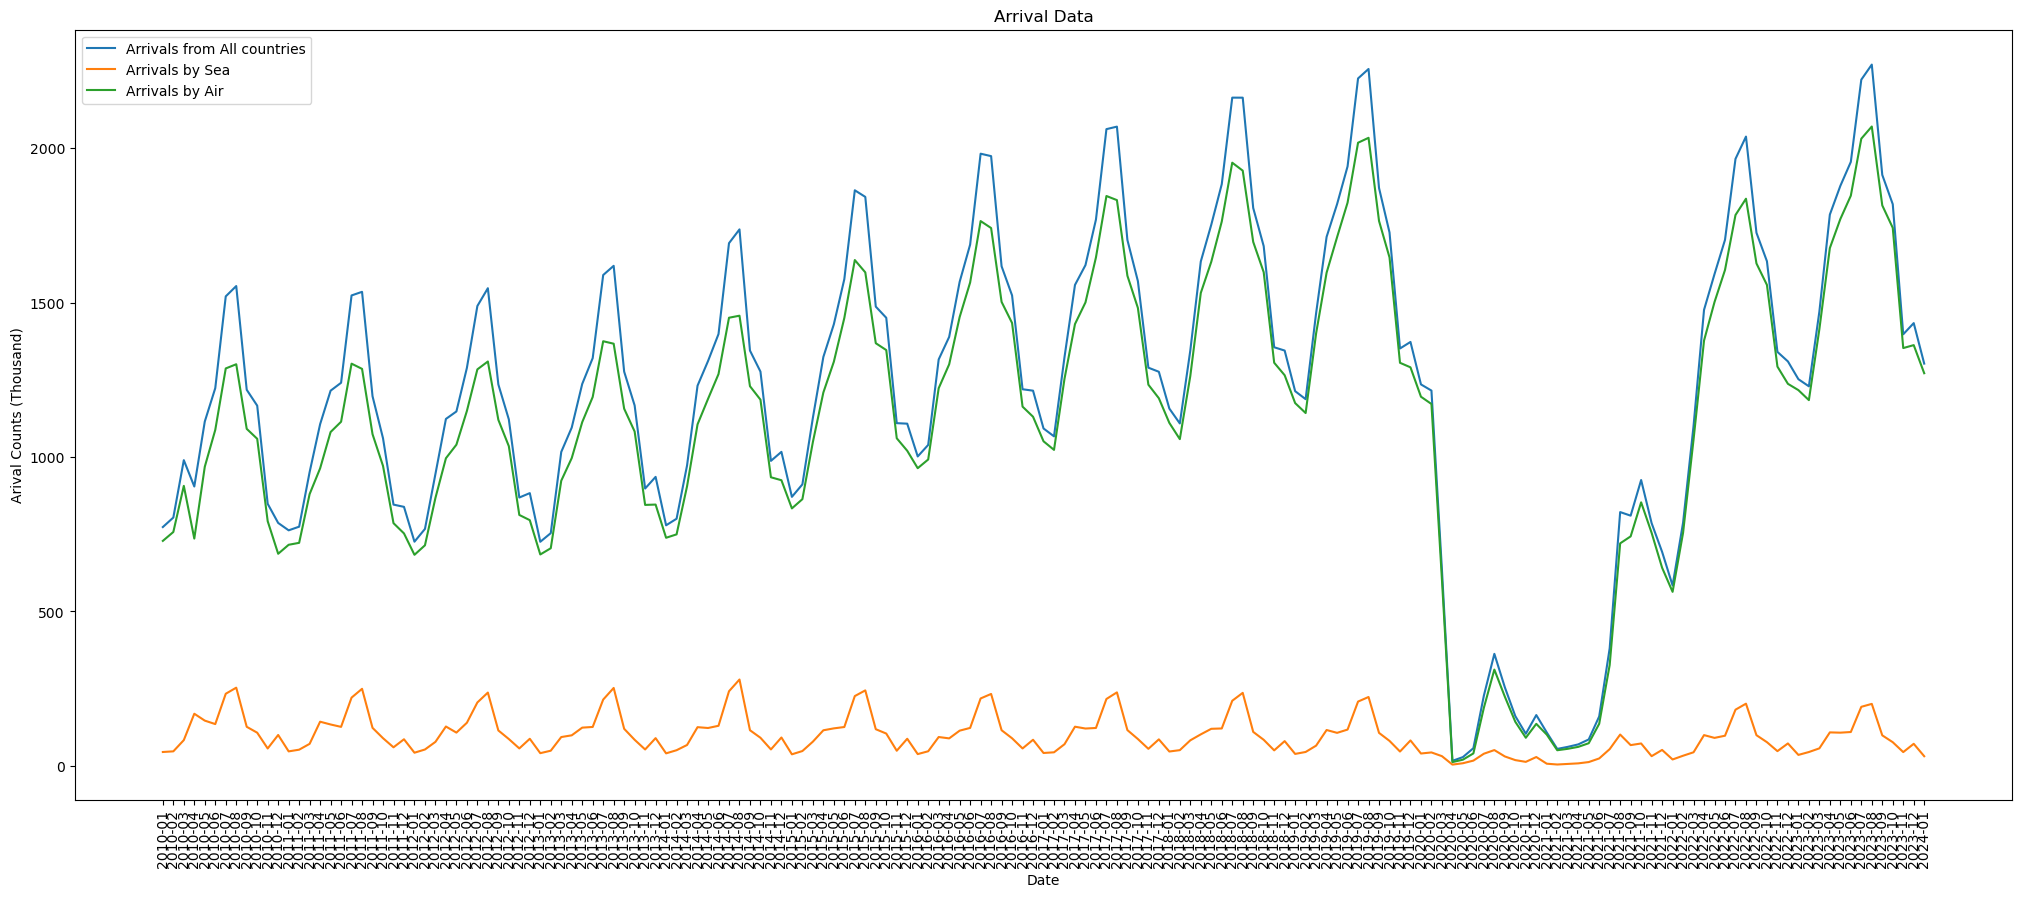

In [65]:
plt.figure(figsize=(25,10))
sns.lineplot(x="Date", y='All countries(Thousand)', data=arrivals_df, label='Arrivals from All countries')
sns.lineplot(x="Date", y='Sea(Thousand)', data=arrivals_df, label='Arrivals by Sea')
sns.lineplot(x="Date", y='Air(Thousand)', data=arrivals_df, label='Arrivals by Air')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Arival Counts (Thousand)')
plt.title('Arrival Data')

# Rotate the dates vertically
plt.xticks(rotation=90)

# Show legend
plt.legend()

# Show the line plot
plt.show()


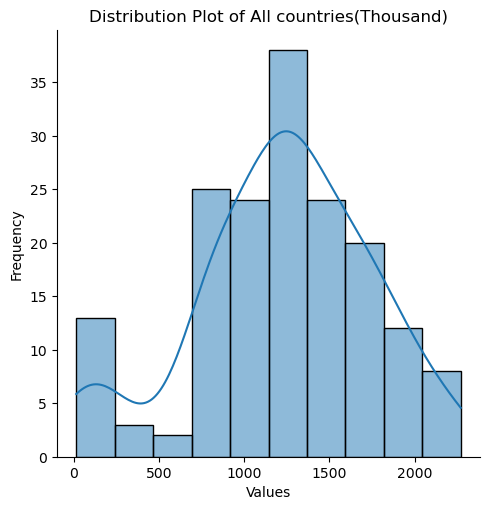

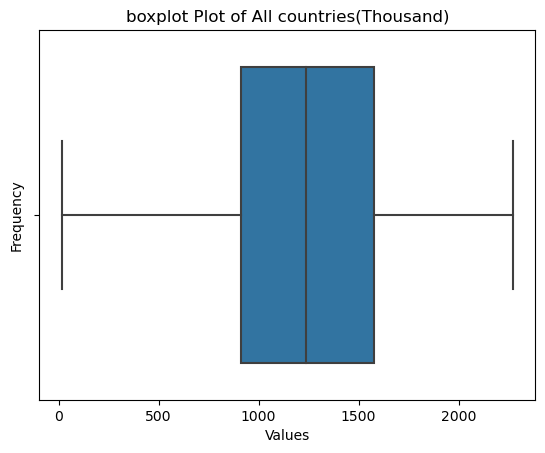

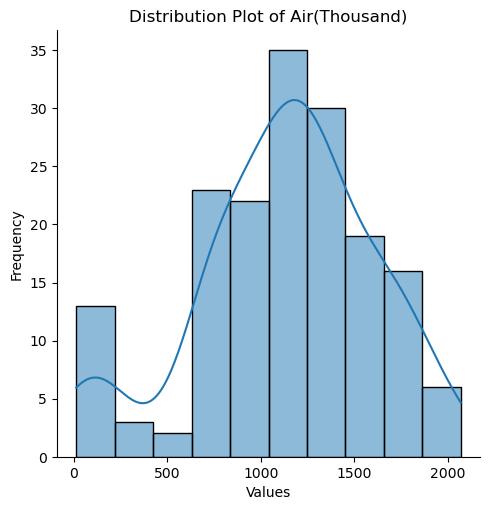

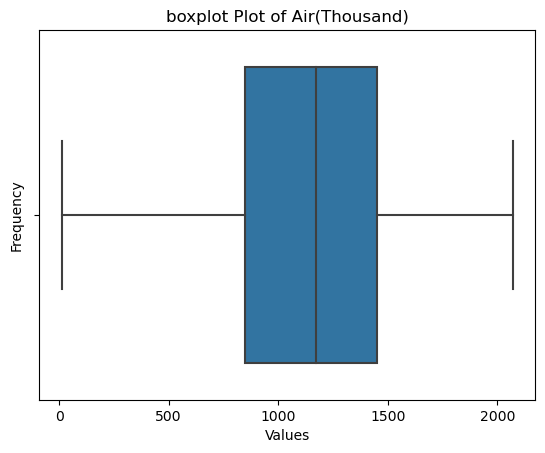

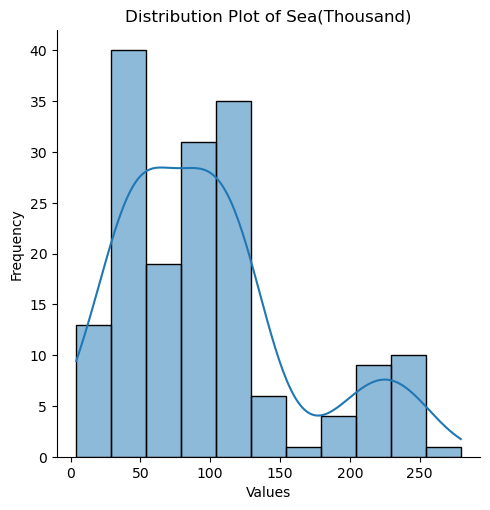

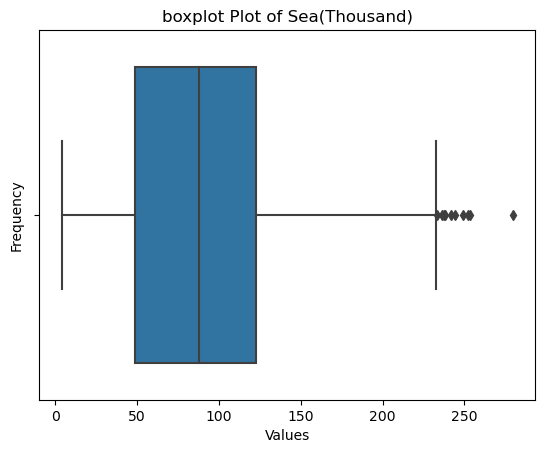

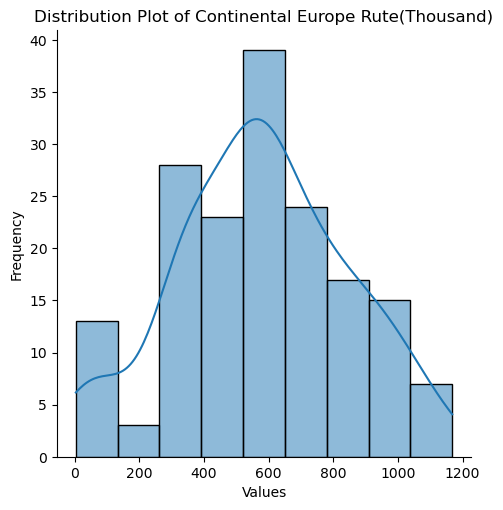

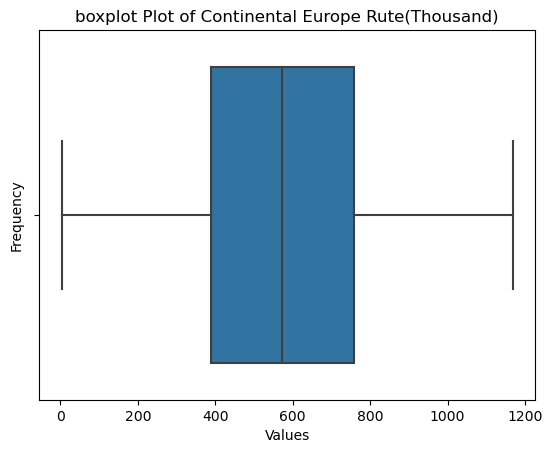

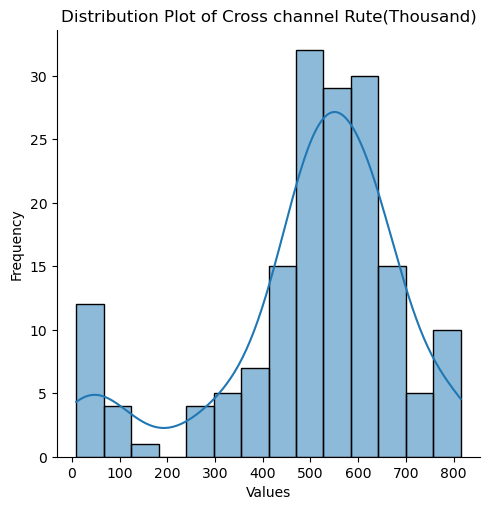

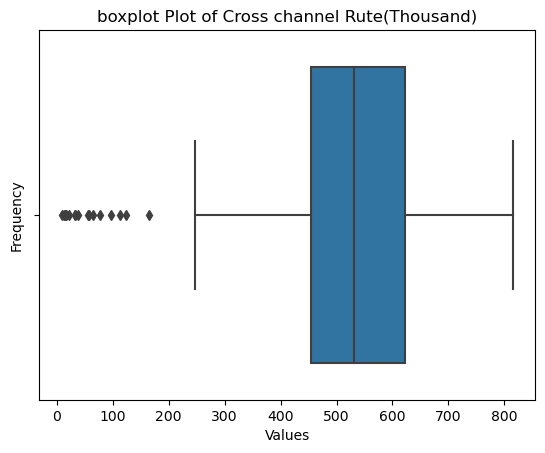

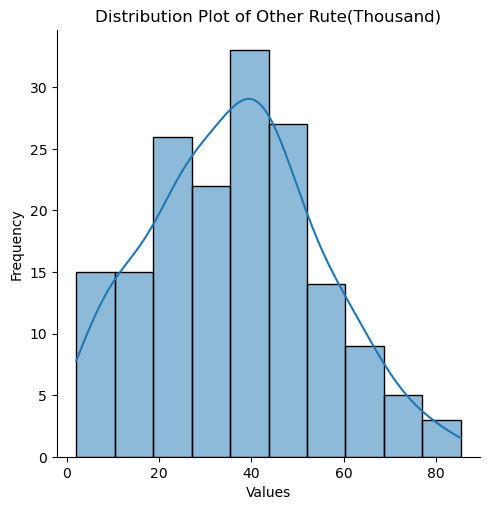

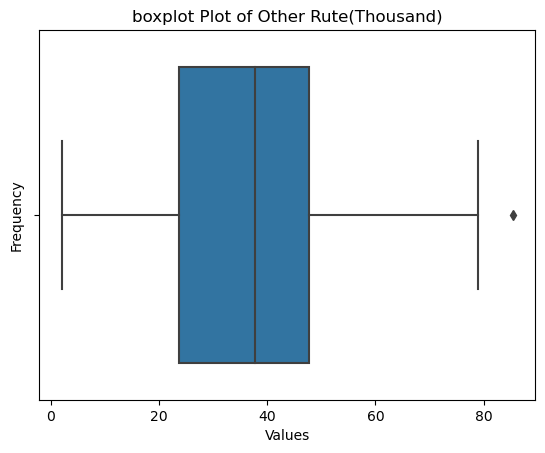

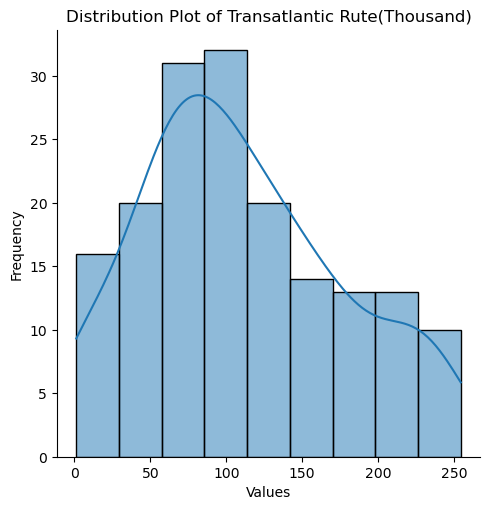

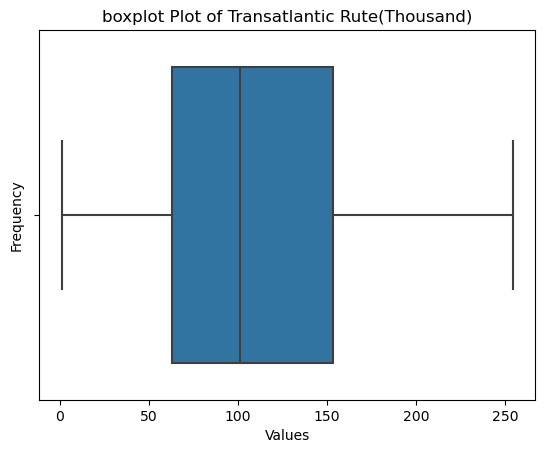

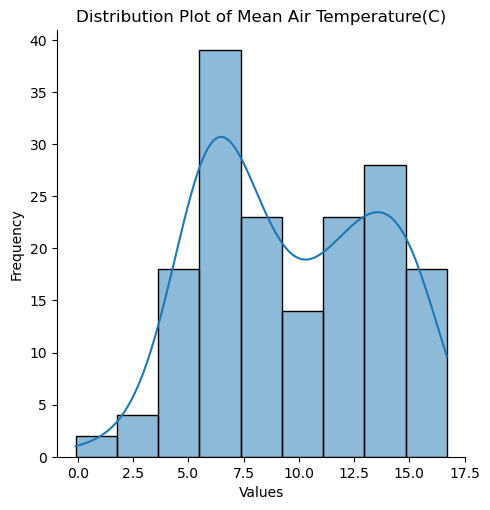

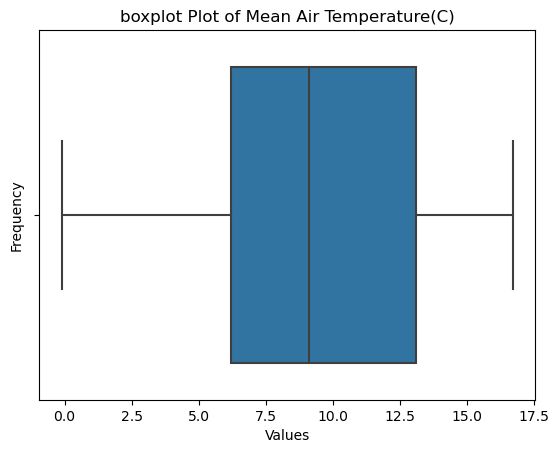

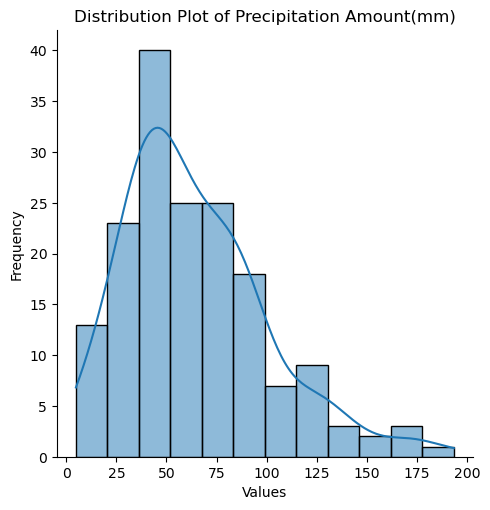

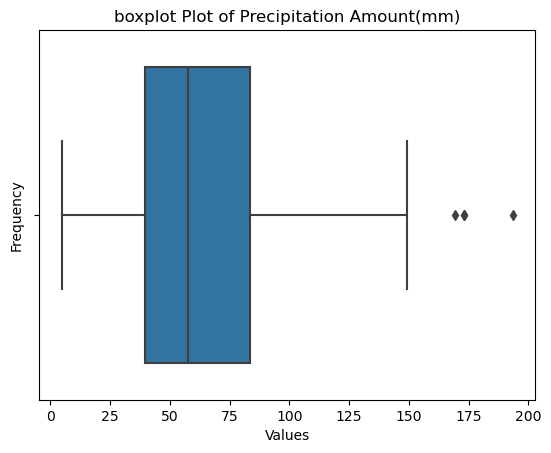

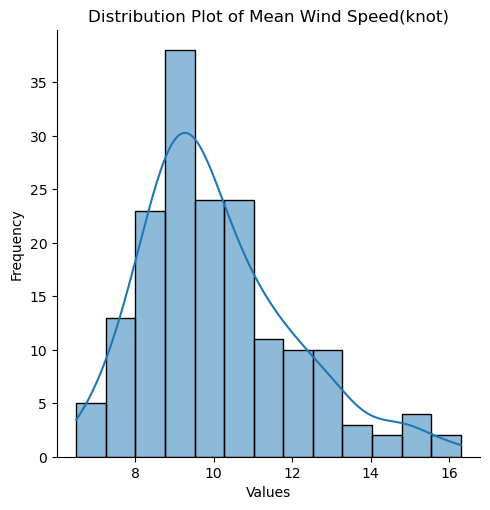

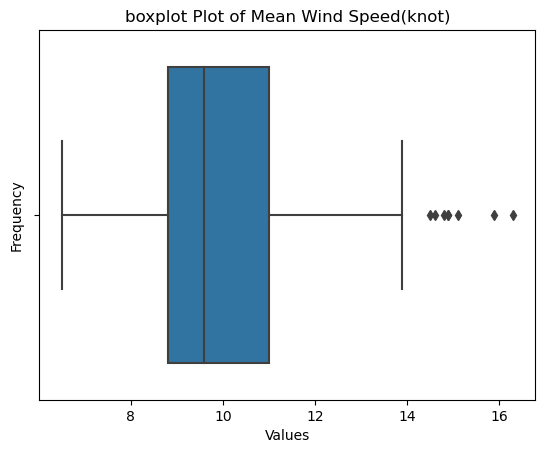

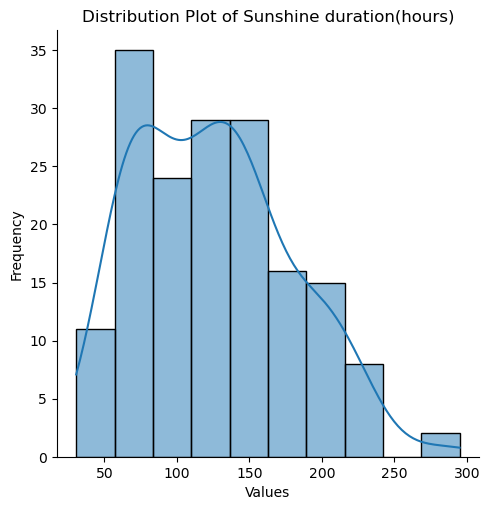

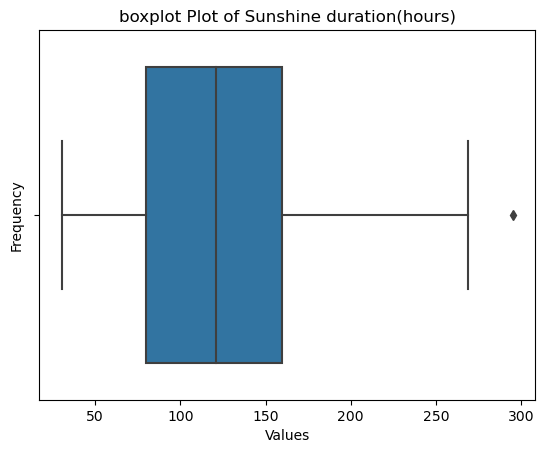

In [66]:
#Assuming df is your DataFrame containing numerical columns
numerical_columns = arrivals_df.select_dtypes(include=['int', 'float']).columns

#Loop through each numerical column
for column in numerical_columns:
    # Create a distplot for the current column
    sns.displot(data=arrivals_df, x=column, kde=True)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column}')
    plt.show();

    sns.boxplot(data=arrivals_df, x=column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'boxplot Plot of {column}')

In [81]:
#Rows from 02-2020 to 02-2022 was isolated 

# Convert 'Date' column to datetime format
arrivals_df['Date'] = pd.to_datetime(arrivals_df['Date'])

# Define the start and end dates of the range
start_date = '2020-02-01'
end_date = '2022-03-01'

# Filter the DataFrame to keep rows outside the specified date range
arrivals2_df = arrivals_df[(arrivals_df['Date'] < start_date) | (arrivals_df['Date'] > end_date)]


#Reset the index to match the desired output
arrivals2_df.reset_index(drop=True, inplace=True)

In [83]:
arrivals2_df.tail(3)

,Date,All countries(Thousand),Air(Thousand),Sea(Thousand),Continental Europe Rute(Thousand),Cross channel Rute(Thousand),Other Rute(Thousand),Transatlantic Rute(Thousand),Mean Air Temperature(C),Precipitation Amount(mm),Mean Wind Speed(knot),Sunshine duration(hours)
140,2023-11-01,1397.4,1352.8,44.5,666.6,540.3,59.7,130.9,7.3,65.1,9.3,77.2
141,2023-12-01,1433.6,1362.3,71.3,636.4,603.7,58.3,135.2,7.5,68.5,12.1,54.9
142,2024-01-01,1302.5,1271.3,31.1,677.9,464.5,68.5,91.6,5.0,61.3,10.4,78.7


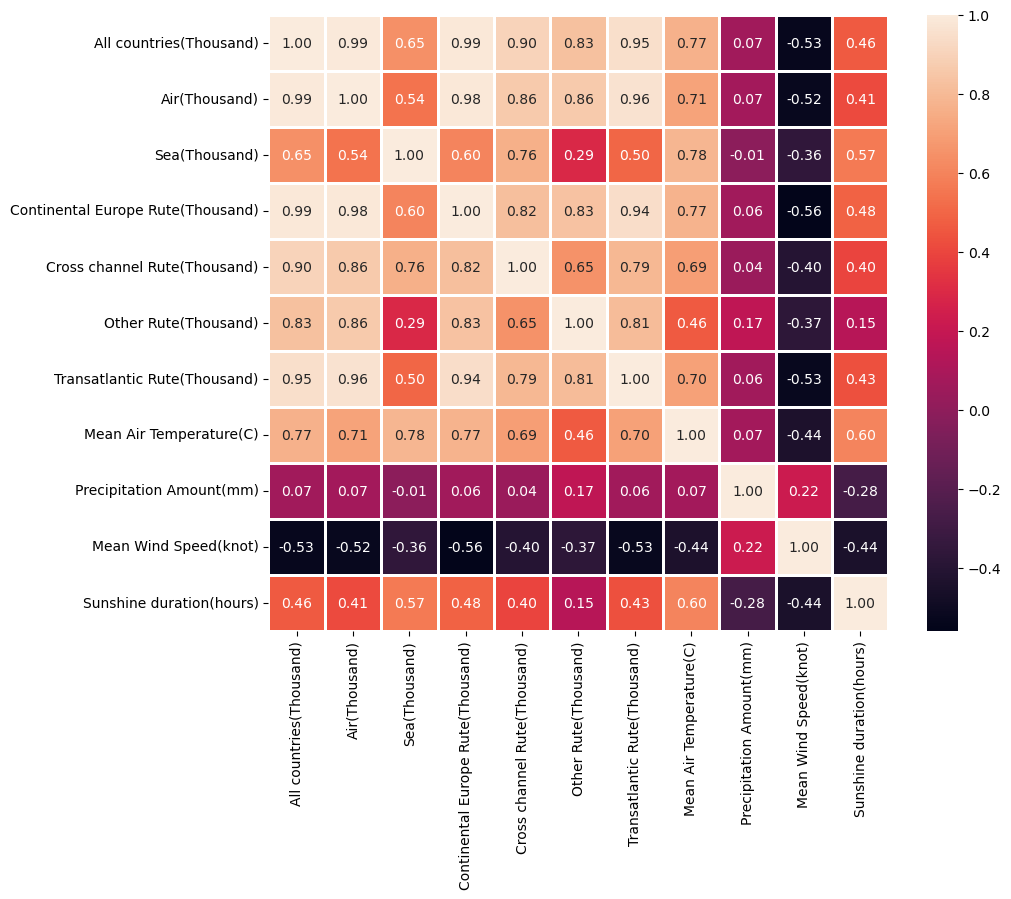

In [76]:
#Code utilized from ML Week 1 Toutorial_1
numeric_df = arrivals2_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot = True, fmt = '.2f', linewidths =2);
plt.show()

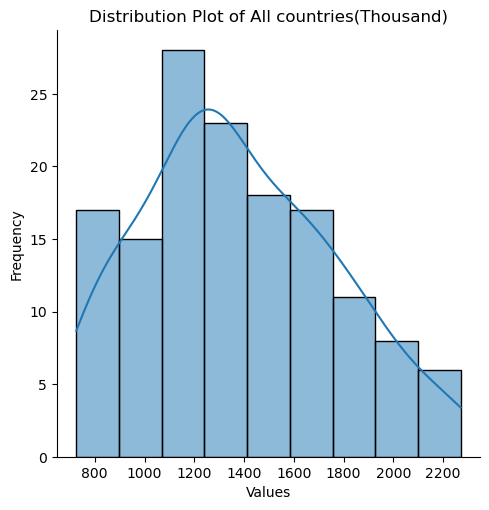

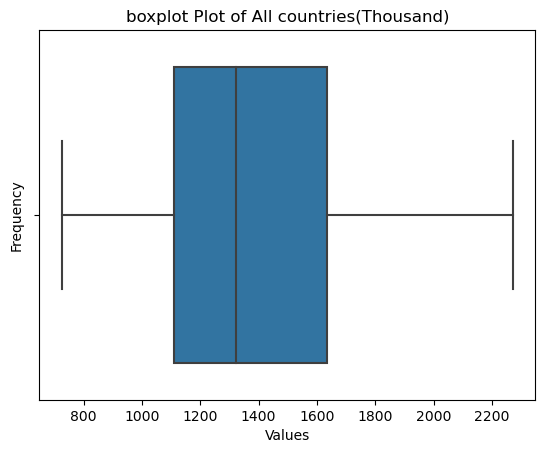

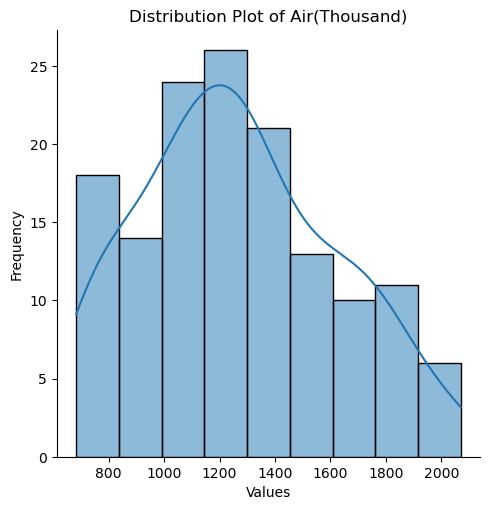

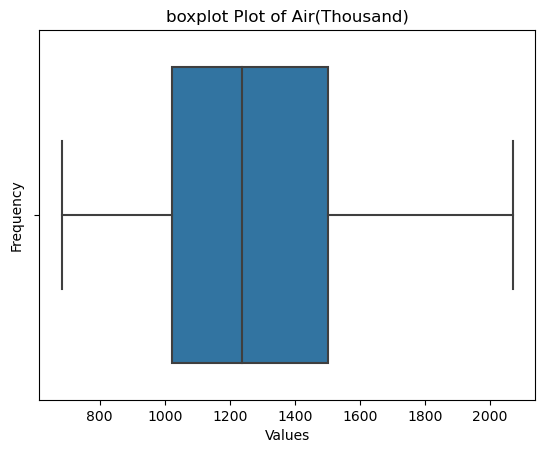

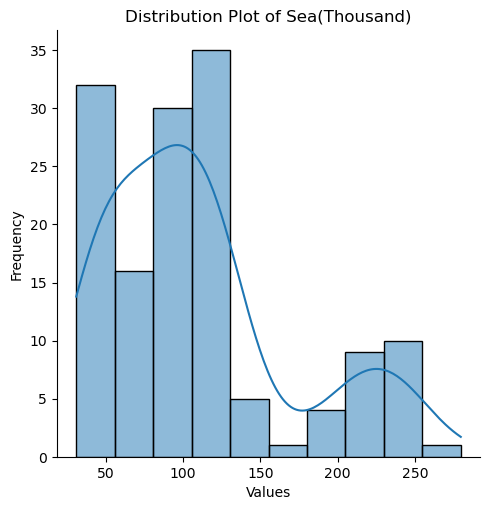

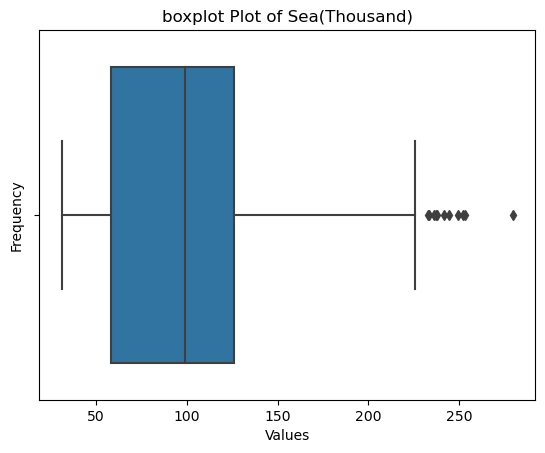

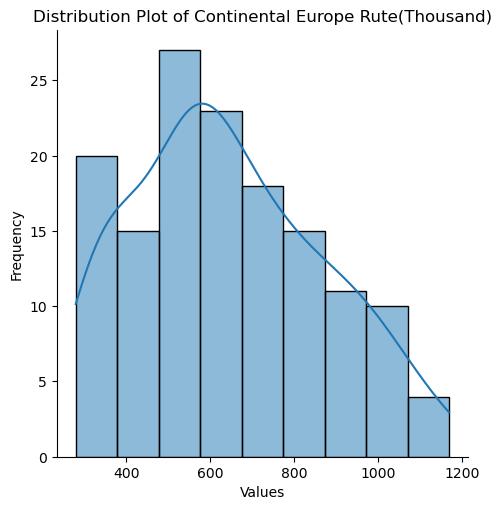

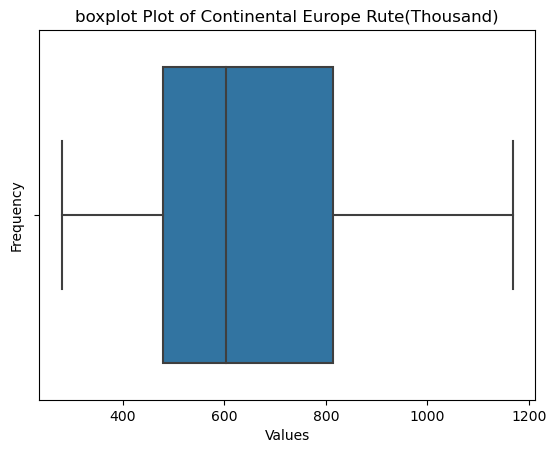

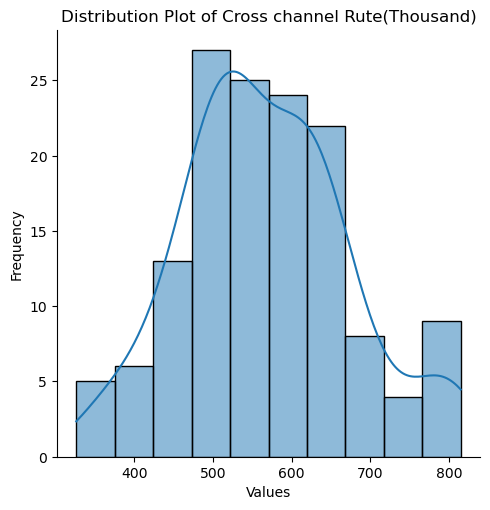

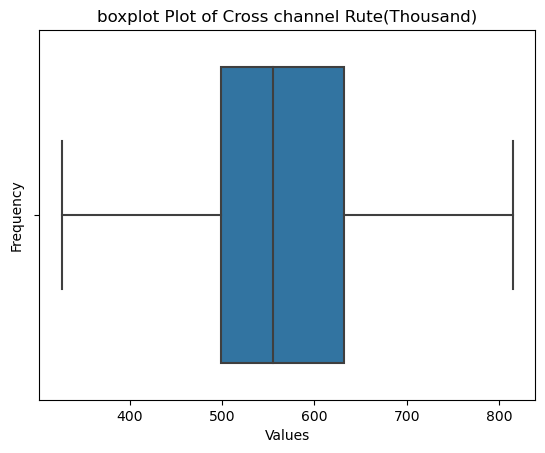

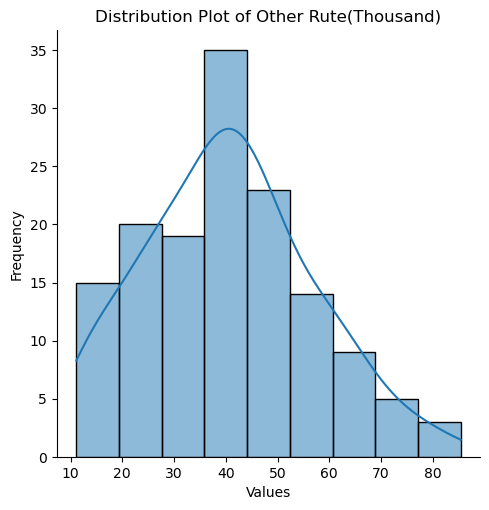

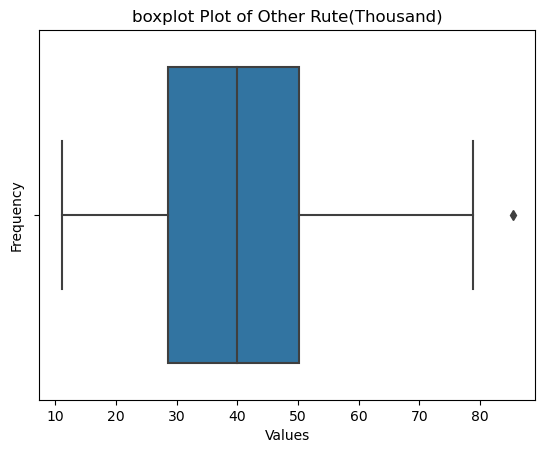

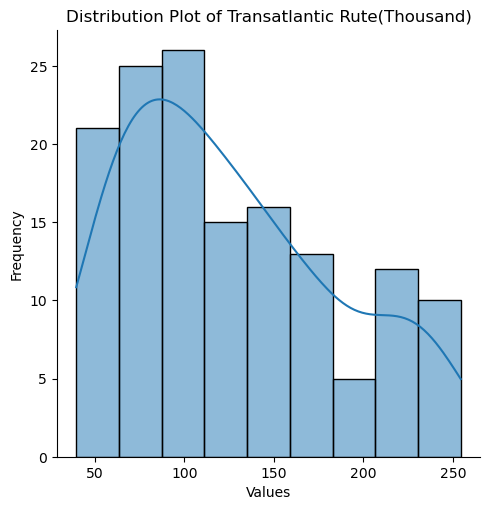

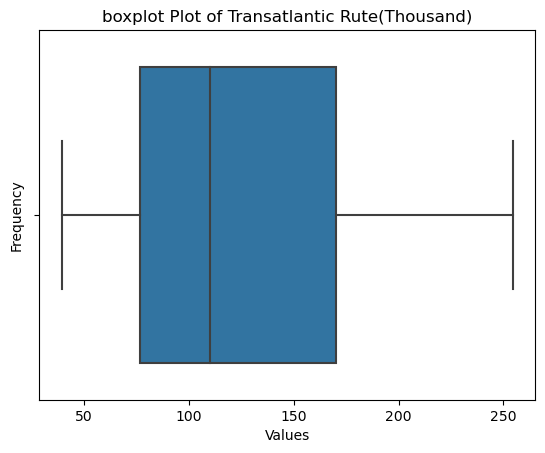

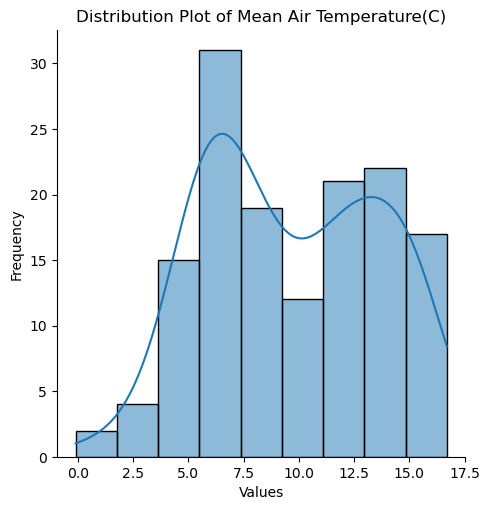

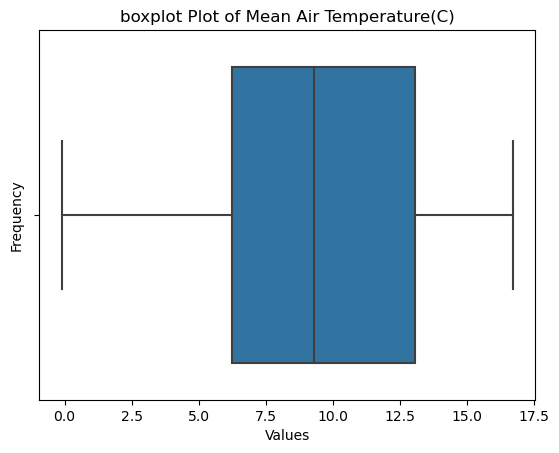

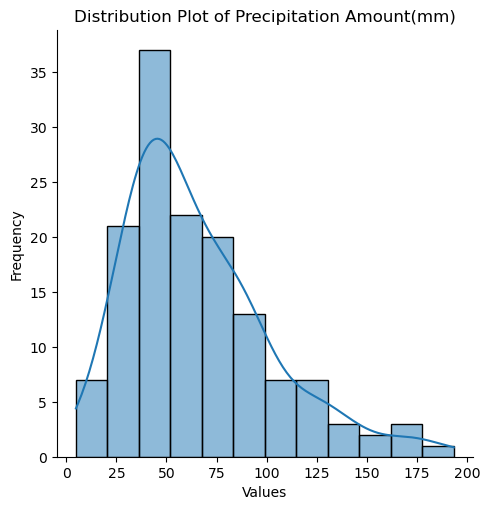

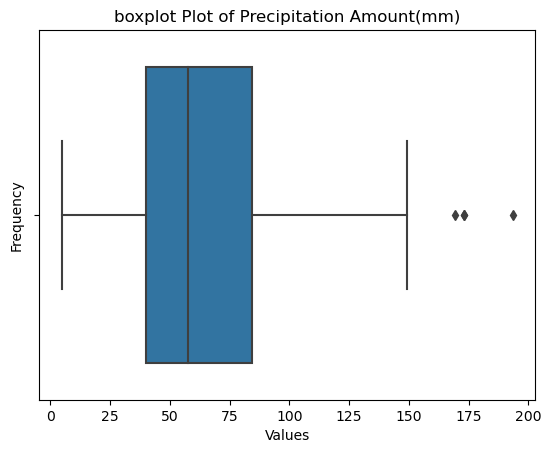

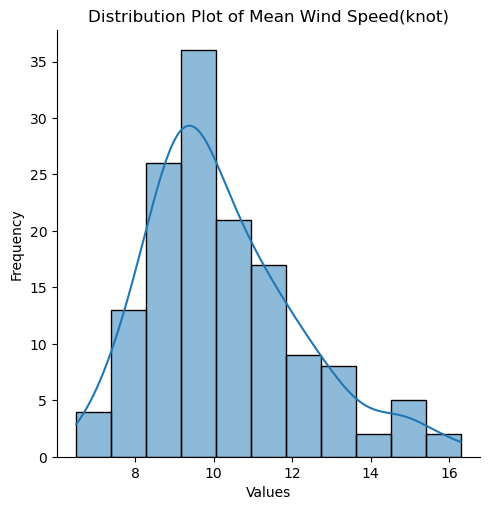

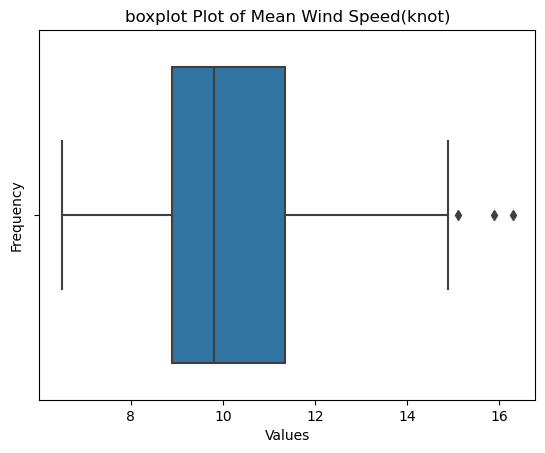

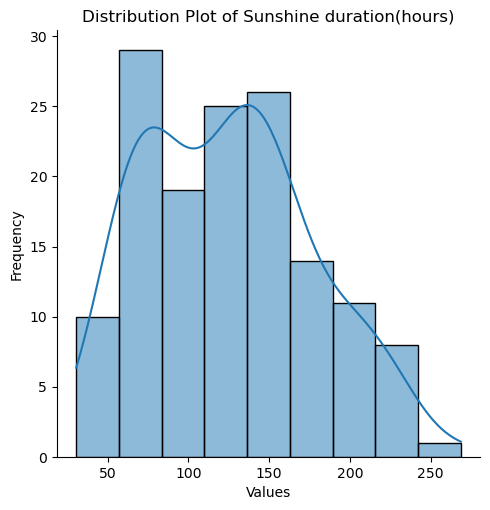

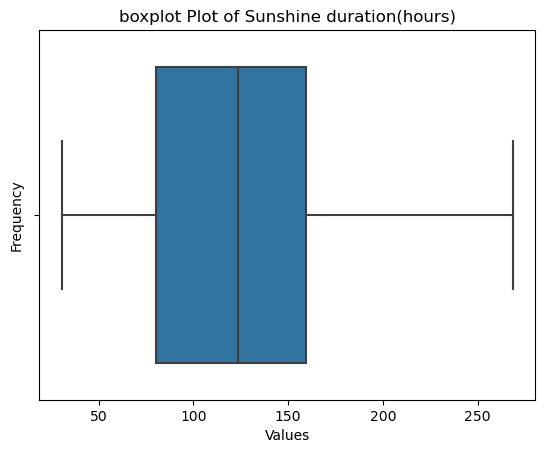

In [77]:
#Assuming df is your DataFrame containing numerical columns
numerical_columns = arrivals2_df.select_dtypes(include=['int', 'float']).columns

#Loop through each numerical column
for column in numerical_columns:
    # Create a distplot for the current column
    sns.displot(data=arrivals2_df, x=column, kde=True)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column}')
    plt.show();

    sns.boxplot(data=arrivals2_df, x=column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'boxplot Plot of {column}')

In [ ]:
#Import the libraries
from scipy.stats import binom #BINOMIAL DISTRIBUTION


## To do list:

4. study time series problems
5. study the ML methods
6. Repoooort :)

In [ ]:
#Refrance: https://stackoverflow.com/questions/59295095/how-do-i-save-data-in-pythonpandas
#Save the reselt dataset
arrivals2_df.to_csv('CA1_Arrivals2.csv')

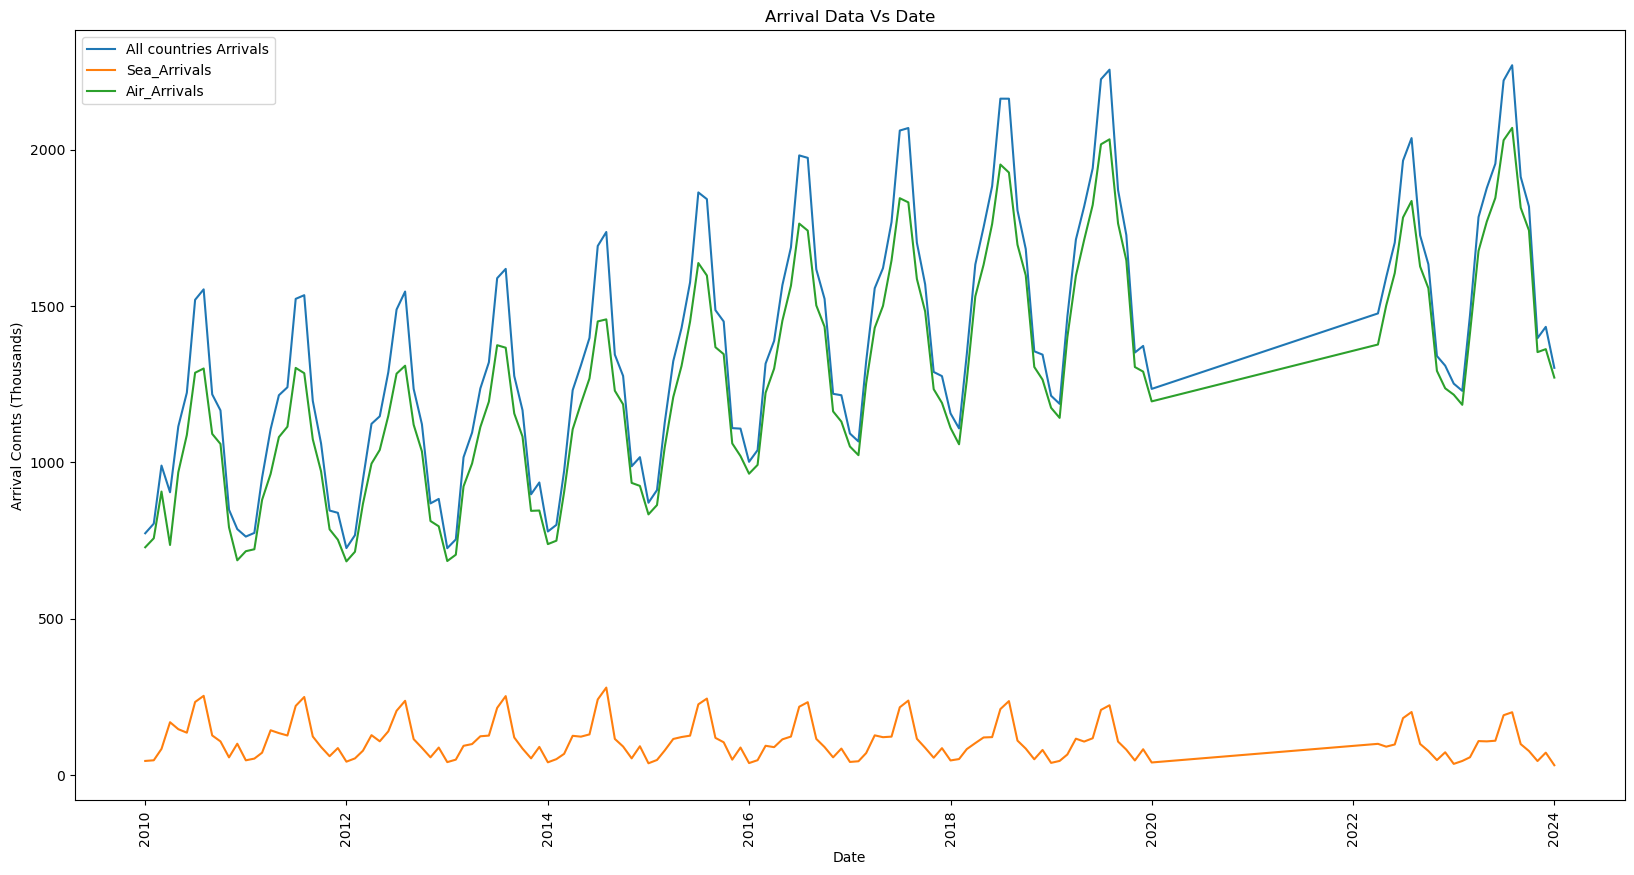

In [86]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Date", y='All countries(Thousand)', data=arrivals2_df, label='All countries Arrivals')
sns.lineplot(x="Date", y='Sea(Thousand)', data=arrivals2_df, label='Sea_Arrivals')
sns.lineplot(x="Date", y='Air(Thousand)', data=arrivals2_df, label='Air_Arrivals')
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Arrival Connts (Thousands)')
plt.title('Arrival Data Vs Date')

# Rotate the dates vertically
plt.xticks(rotation=90)

# Show legend
plt.legend()

# Show the line plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


## Reference: 
* Machine Learning Class.
* <p>https://machinelearningmastery.com/elastic-net-regression-in-python/</p>